In [1]:
import pandas as pd

# matplotlib = this is for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("GL_sal_data_cleaned.csv")
df.head()


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,Revenue,min_salary,max_salary,average-salary,currency,company_txt,age,python_yn,data,analysis
0,Data Scientist,"₹417K-₹1,000K (Glassdoor Est.)",If you are a data junkie who would like to wra...,3.1,BlueJeans\r\n3.1,Bangalore,201 to 500 Employees,2009,Company - Private,Enterprise Software & Network Solutions,...,Unknown / Non-Applicable,417,1000,708.5,LAKh,BlueJeans,11,0,0,0
1,Data Scientist,₹698K-₹960K (Glassdoor Est.),Relocation Assistance Offered Within Country\r...,4.2,Colgate-Palmolive\r\n4.2,Mumbai,10000+ Employees,1806,Company - Public,Consumer Products Manufacturing,...,$10+ billion (USD),698,960,829.0,LAKh,Colgate-Palmolive,214,1,0,1
2,Data Scientist - Technology Development,₹350K-₹679K (Glassdoor Est.),Relocation Level: Domestic\r\n\r\nHiring Manag...,3.6,Micron Technology\r\n3.6,Hyderābād,10000+ Employees,1978,Company - Public,Computer Hardware & Software,...,$10+ billion (USD),350,679,514.5,LAKh,Micron Technology,42,1,0,1
3,Senior / Data Science Engineer,"₹490K-₹1,094K (Glassdoor Est.)","Gainsight™ is a venture-backed, fast-growing t...",4.2,Gainsight\r\n4.2,Hyderābād,501 to 1000 Employees,2009,Company - Private,Enterprise Software & Network Solutions,...,Unknown / Non-Applicable,490,1094,792.0,LAKh,Gainsight,11,1,0,1
4,Business Analyst - Data Science,₹479K-₹700K (Glassdoor Est.),"With a startup spirit and 90,000+ curious and ...",3.8,Genpact\r\n3.8,Bangalore,10000+ Employees,1997,Company - Public,IT Services,...,$2 to $5 billion (USD),479,700,589.5,LAKh,Genpact,23,1,0,1


In [2]:
# part of Exploratory data analysis is also Feature Engineering.
def title_simplifier(title):
    if "data scientist" in title.lower():
        return "data scientist"
    elif "data engineer" in title.lower():
        return "data engineer"
    elif "analyst" in title.lower():
        return "analyst"
    elif "machine learning" in title.lower():
        return "mle"
    elif "manager" in title.lower():
        return "manager"
    elif "director" in title.lower():
        return "director"
    else:
        return "na"


def seniority(title):
    if ("sr" in title.lower() or "senior" in title.lower()
            or "sr" in title.lower() or "lead" in title.lower()
            or "principal" in title.lower()):
        return "senior"
    elif "jr" in title.lower() or "jr." in title.lower():
        return "jr"
    else:
        return "na"


# --x----
## Job title and seniority
# --x---

##  Fix state Los Angeles

##  Job description length

##  Competitor count

## hourly wage to annual

# remove new line from job title


In [3]:
df["job_simp"] = df["Job Title"].apply(title_simplifier)

df.job_simp.value_counts()


data scientist    12
na                 3
analyst            2
mle                1
Name: job_simp, dtype: int64

In [4]:
df["Seniority"] = df["Job Title"].apply(seniority)

df.Seniority.value_counts()


na        15
senior     3
Name: Seniority, dtype: int64

In [5]:
df.Location.value_counts()

Bangalore    9
Hyderābād    4
Mumbai       2
Pune         1
Gurgaon      1
Noida        1
Name: Location, dtype: int64

In [6]:
df.company_txt


0             BlueJeans
1     Colgate-Palmolive
2     Micron Technology
3             Gainsight
4               Genpact
5                Luxoft
6               Verizon
7                 Wibmo
8              Novartis
9           GroundTruth
10               Amazon
11              Genpact
12               Paypal
13              Genpact
14             Tredence
15            Honeywell
16             Novartis
17          Morningstar
Name: company_txt, dtype: object

<AxesSubplot:>

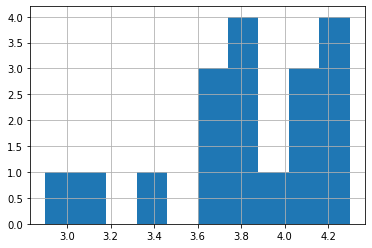

In [7]:
"""
hist() - func used to display the Histogram of the given / fetched data
"""
df.Rating.hist()


<AxesSubplot:>

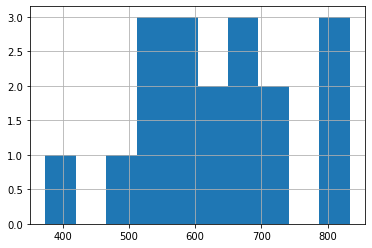

In [8]:
df["average-salary"].hist()

<AxesSubplot:>

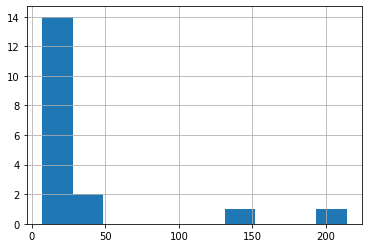

In [9]:
df.age.hist()

<AxesSubplot:>

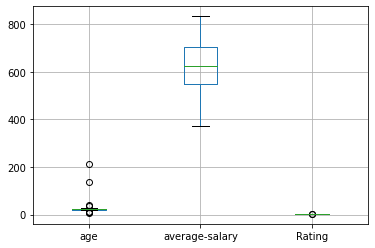

In [10]:
# using blogspot to plotting box for grouping by a certain attribute

df.boxplot(column=["age", "average-salary", "Rating"])


<AxesSubplot:>

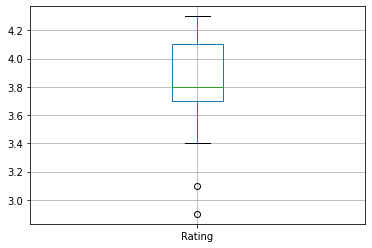

In [11]:
df.boxplot(column="Rating")

<AxesSubplot:>

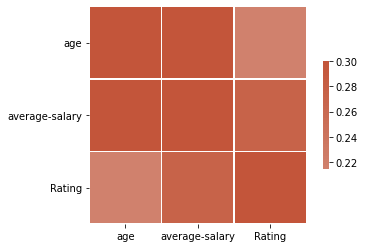

In [12]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(
    df[["age", "average-salary", "Rating"]].corr(),
    vmax=0.3,
    center=0,
    cmap=cmap,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)


In [13]:
df["desc_len"] = df["Job Description"].apply(lambda x: len(x))
df["desc_len"]


0     1448
1     5092
2     4189
3     4459
4     2400
5     1547
6     3057
7     2510
8     2000
9     3780
10    2098
11    3256
12    3284
13    2880
14    2478
15    4402
16    3912
17    4210
Name: desc_len, dtype: int64

<AxesSubplot:>

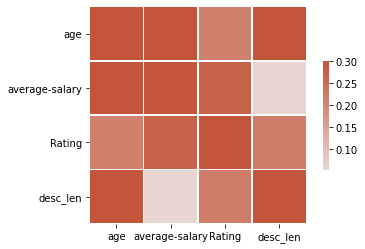

In [14]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(
    df[["age", "average-salary", "Rating", "desc_len"]].corr(),
    vmax=0.3,
    center=0,
    cmap=cmap,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)


In [15]:
df_cat = df[[
    "Location",
    "Size",
    "Type of ownership",
    "Industry",
    "Sector",
    "Revenue",
    "company_txt",
    "python_yn",
    "data",
    "analysis",
    "job_simp",
    "Seniority",
]]


Graph for Location: total =6


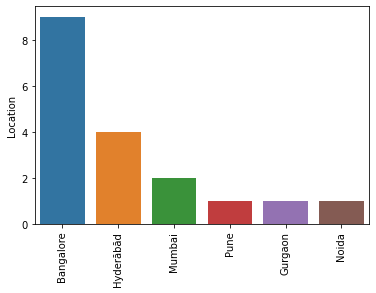

Graph for Size: total =4


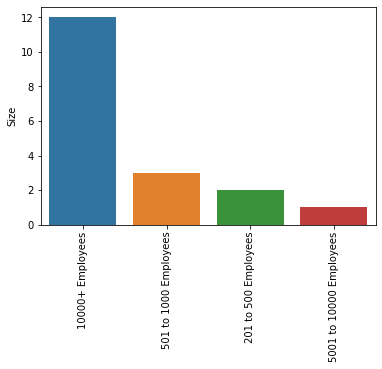

Graph for Type of ownership: total =2


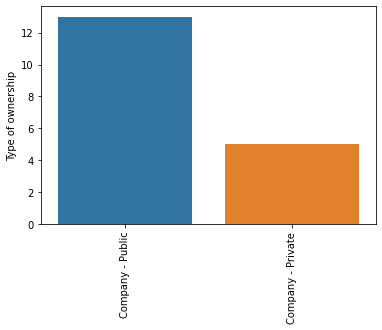

Graph for Industry: total =10


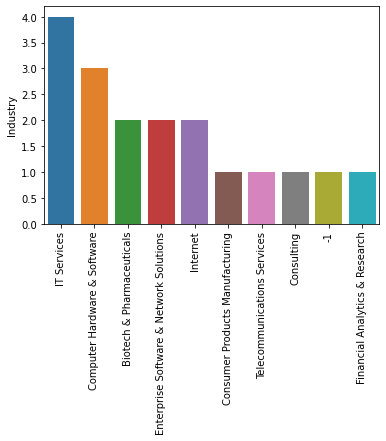

Graph for Sector: total =7


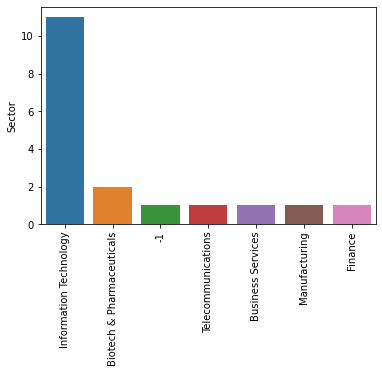

Graph for Revenue: total =6


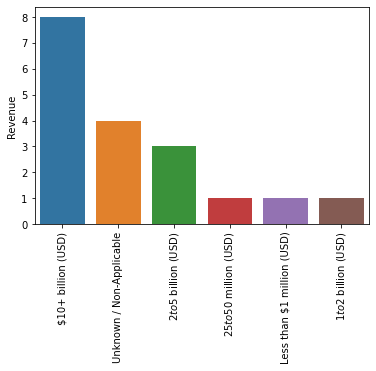

Graph for company_txt: total =15


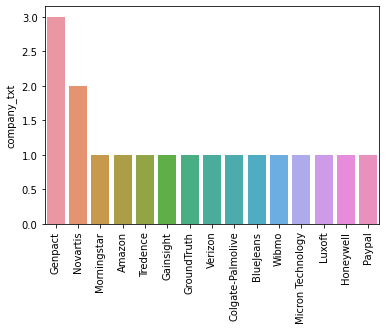

Graph for python_yn: total =2


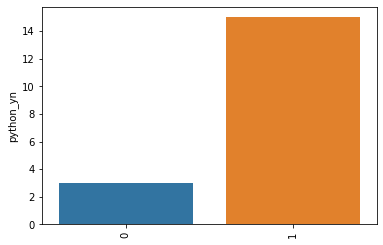

Graph for data: total =1


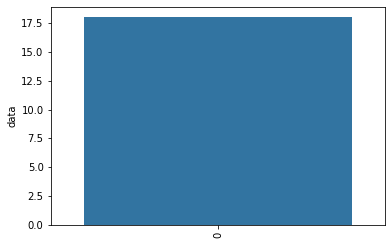

Graph for analysis: total =2


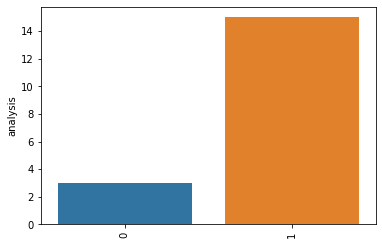

Graph for job_simp: total =4


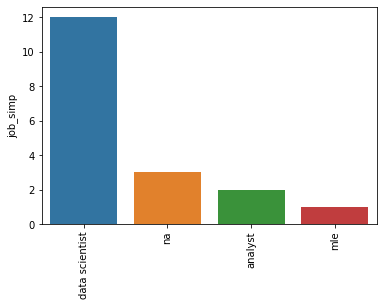

Graph for Seniority: total =2


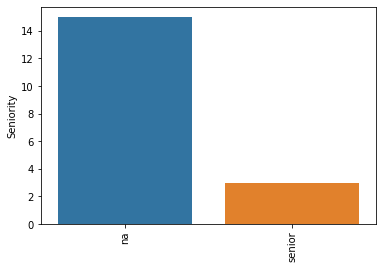

In [16]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: total =%d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: total =6


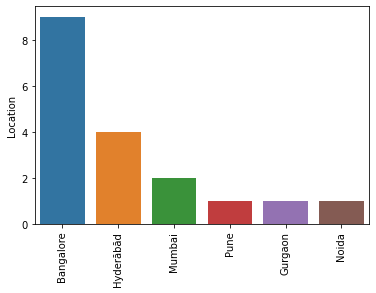

Graph for company_txt: total =10


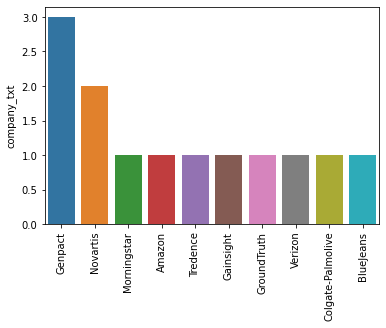

Graph for Industry: total =10


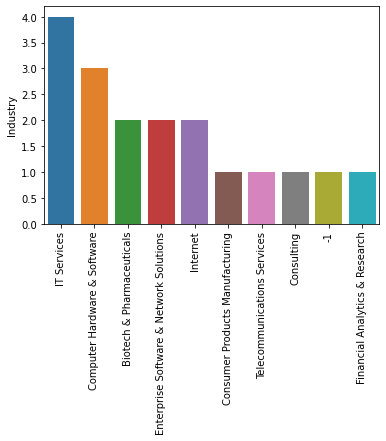

In [17]:
for i in df_cat[["Location", "company_txt", "Industry"]].columns:
    # cat_num = df_cat[i][:10].value_counts()
    cat_num = df_cat[i].value_counts()[:10]
    print("Graph for %s: total =%d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()


In [18]:
# starting pivot tables

pd.pivot_table(df, index="job_simp", values="average-salary")

# # %%
# pd.pivot_table(df, index=["job_simp", "seniority"], values="average-salary")


,average-salary
job_simp,
analyst,481.750000
data scientist,626.208333
mle,614.000000
na,767.666667


In [19]:
pd.pivot_table(df, index=["job_simp", "Seniority"], values="average-salary")


average-salary
job_simp       Seniority                
analyst        na                 481.75
data scientist na                 629.10
               senior             611.75
mle            na                 614.00
na             na                 755.50
               senior             792.00

In [20]:
pd.pivot_table(df, index=["Location", "job_simp"],
               values="average-salary").sort_values("average-salary",
                                                    ascending=False)


average-salary
Location  job_simp                      
Noida     na                  833.500000
Hyderābād na                  792.000000
Mumbai    data scientist      684.250000
Bangalore na                  677.500000
          data scientist      659.333333
          mle                 614.000000
Pune      data scientist      600.000000
Bangalore analyst             589.500000
Hyderābād data scientist      530.000000
Gurgaon   analyst             374.000000

In [21]:
pd.pivot_table(df, index=["Location", "job_simp"],
               values="average-salary").sort_values("Location",
                                                    ascending=False)


average-salary
Location  job_simp                      
Pune      data scientist      600.000000
Noida     na                  833.500000
Mumbai    data scientist      684.250000
Hyderābād data scientist      530.000000
          na                  792.000000
Gurgaon   analyst             374.000000
Bangalore analyst             589.500000
          data scientist      659.333333
          mle                 614.000000
          na                  677.500000

In [22]:
pd.pivot_table(df[df.job_simp == "data scientist"],
               index="Location",
               values="average-salary").sort_values("Location",
                                                    ascending=False)


,average-salary
Location,
Pune,600.000000
Mumbai,684.250000
Hyderābād,530.000000
Bangalore,659.333333


In [23]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'average-salary', 'currency', 'company_txt', 'age', 'python_yn', 'data',
       'analysis', 'job_simp', 'Seniority', 'desc_len'],
      dtype='object')

In [24]:
df_pivots = df[[
    "Rating",
    "Industry",
    "Sector",
    "Revenue",
    "python_yn",
    "Type of ownership",
    "average-salary",
]]


In [26]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i,
                         values="average-salary").sort_values(
                             "average-salary", ascending=False))


Rating
        average-salary
Rating                
4.3         833.500000
4.2         740.333333
3.1         708.500000
3.7         680.750000
3.8         655.250000
2.9         614.000000
4.1         538.333333
3.9         532.000000
3.6         514.500000
3.4         374.000000
Industry
                                         average-salary
Industry                                               
Consumer Products Manufacturing              829.000000
Internet                                     756.750000
Enterprise Software & Network Solutions      750.250000
Consulting                                   677.500000
IT Services                                  635.250000
Computer Hardware & Software                 604.166667
Financial Analytics & Research               539.500000
Biotech & Pharmaceuticals                    537.750000
Telecommunications Services                  532.000000
-1                                           374.000000
Sector
                           av

ValueError: Grouper for 'average-salary' not 1-dimensional

In [29]:
pd.pivot_table(df_pivots, index="Revenue", columns="python_yn", values='average-salary', aggfunc= 'count')


python_yn,0,1
Revenue,,
$1 to $2 billion (USD),NaN,1.0
$10+ billion (USD),1.0,7.0
$2 to $5 billion (USD),NaN,3.0
$25 to $50 million (USD),1.0,NaN
Less than $1 million (USD),NaN,1.0
Unknown / Non-Applicable,1.0,3.0


In [30]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


ModuleNotFoundError: No module named 'wordcloud'

In [31]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


ModuleNotFoundError: No module named 'nltk'

In [33]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [34]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [35]:
words = " ".join(df["Job Description"])


def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(
    background_color="white",
    random_state=1,
    stopwords=STOPWORDS,
    max_words=2000,
    width=800,
    height=1500,
)
wc.generate(text)

plt.figure(figsize=[10, 10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Vivan/nltk_data'
    - 'C:\\Users\\Vivan\\AppData\\Local\\Programs\\Python\\Python39-32\\nltk_data'
    - 'C:\\Users\\Vivan\\AppData\\Local\\Programs\\Python\\Python39-32\\share\\nltk_data'
    - 'C:\\Users\\Vivan\\AppData\\Local\\Programs\\Python\\Python39-32\\lib\\nltk_data'
    - 'C:\\Users\\Vivan\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [36]:

nltk.download('stopwords')
words = " ".join(df["Job Description"])


def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(
    background_color="white",
    random_state=1,
    stopwords=STOPWORDS,
    max_words=2000,
    width=800,
    height=1500,
)
wc.generate(text)

plt.figure(figsize=[10, 10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


NameError: name 'nltk' is not defined

In [37]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [38]:

nltk.download('stopwords')
words = " ".join(df["Job Description"])


def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(
    background_color="white",
    random_state=1,
    stopwords=STOPWORDS,
    max_words=2000,
    width=800,
    height=1500,
)
wc.generate(text)

plt.figure(figsize=[10, 10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vivan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\Vivan/nltk_data'
    - 'C:\\Users\\Vivan\\AppData\\Local\\Programs\\Python\\Python39-32\\nltk_data'
    - 'C:\\Users\\Vivan\\AppData\\Local\\Programs\\Python\\Python39-32\\share\\nltk_data'
    - 'C:\\Users\\Vivan\\AppData\\Local\\Programs\\Python\\Python39-32\\lib\\nltk_data'
    - 'C:\\Users\\Vivan\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [39]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vivan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vivan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


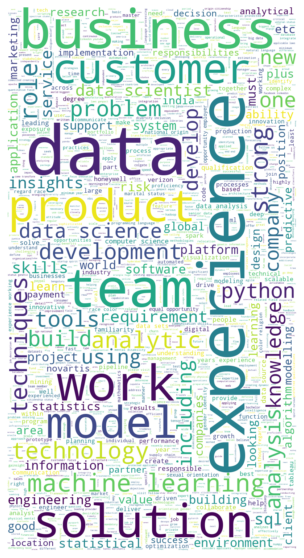

In [40]:

nltk.download("stopwords")
nltk.download("punkt")
words = " ".join(df["Job Description"])


def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(
    background_color="white",
    random_state=1,
    stopwords=STOPWORDS,
    max_words=2000,
    width=800,
    height=1500,
)
wc.generate(text)

plt.figure(figsize=[10, 10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
